# Sampling From PDF using NumPy

Lets define the functions from the homework for the PDF:

In [1]:
import random
import numpy as np

In [2]:
def pdf1(x):
    if x >= 0 and x <= 1: return x
    elif x > 1 and x <= 2: return 2 - x 
    else: return 0

In [3]:
def pdf2(x):
    if x >= 0 and x <= 1: return 1 - x
    elif x > 1 and x <= 2: return x - 1
    else: return 0

To sample, lets cut up the domain into tiny discrete pieces using linspace, which returns a list. Once we do that, we loop through the list and get values from the PDF, which represent the probability of getting that x: 

In [4]:
# create x vector of values from [0,2]
x = np.linspace(0, 2, num=1000, endpoint=True)
# print(x)

# create p(x) vector based on pdf1
p = [ pdf1(i) for i in x ]
sump = sum(p)
p = [ i / sump for i in p ]

Lets plot the PDF, which maps an x value to p(x):

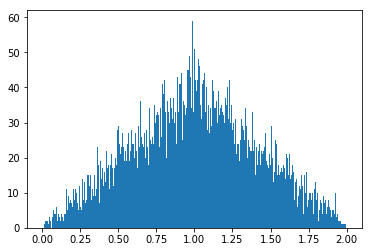

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist([ np.random.choice(x, size=None, replace=True, p=p) for i in range(20000) ], 
        bins=[ 0 + i*(2/len(x)) for i in range(len(x))])
plt.show()

Same but for PDF2:

In [6]:
# create x vector of values from [0,2]
x = np.linspace(0, 2, num=1000, endpoint=True)

# create p(x) vector based on pdf1
p = [ pdf2(i) for i in x ]
sump = sum(p)
p = [ i / sump for i in p ]

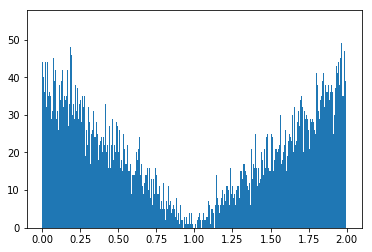

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist([ np.random.choice(x, size=None, replace=True, p=p) for i in range(20000) ],
               bins=[ 0 + i*(2/len(x)) for i in range(len(x))])
plt.show()

The Central Limit Theorem talks about getting samples of size n, and looking at the distribution of the means of these samples. Here I write a function to automate what we do above but for many samples:

In [8]:
def clt(pdf, n):
    means = []

    # create x vector of values from [0,2]
    x = np.linspace(0, 2, num=1000, endpoint=True)

    # create p(x) vector based on pdf1
    p = [ pdf2(i) for i in x ]
    sump = sum(p)
    p = [ i / sump for i in p ]

    for idx, i in enumerate(range(1000)):
        if idx % 100 == 0: print("iter {}".format(idx))
        sample = [ np.random.choice(x, size=None, replace=True, p=p) for i in range(n) ]
        means.append( np.mean(sample) )
    
    return means

Lets run the CLT on PDF1:

iter 0
iter 100
iter 200
iter 300
iter 400
iter 500
iter 600
iter 700
iter 800
iter 900


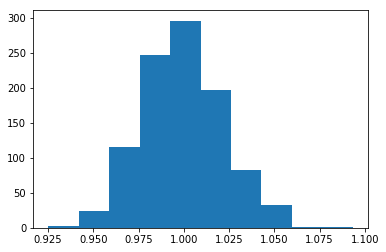

In [9]:
means = clt(pdf1, 1000)
plt.hist(means)
plt.show()

Lets run the CLT on PDF2:

iter 0
iter 100
iter 200
iter 300
iter 400
iter 500
iter 600
iter 700
iter 800
iter 900


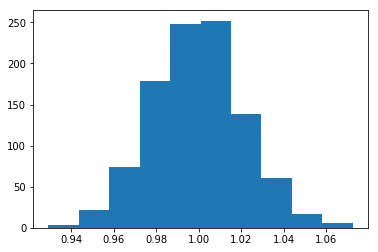

In [11]:
means = clt(pdf2, 1000)
plt.hist(means)
plt.show()

Despite being from a strange custom PDF, the sample means seem normally distributed!